# Paper Figure 2: IO
Raw file accession times and pyRawFileReader interface

This notebook converts raw files and shows accesion times.

In [1]:
import os
from test_files import get_files, prepare_test

multiple_file_test = ['PXD006109_HeLa12_1.raw','PXD006109_HeLa12_2.raw','PXD006109_HeLa12_3.raw','PXD006109_HeLa2_1.raw','PXD006109_HeLa2_2.raw','PXD006109_HeLa2_3.raw']

In [2]:
tmp_folder = 'F:/projects/alphapept/sandbox/temp'
test_folder = 'fig2'

In [3]:
import platform

print(platform.platform())
print(platform.processor())


Windows-10-10.0.19044-SP0
Intel64 Family 6 Model 85 Stepping 4, GenuineIntel


In [4]:
get_files(tmp_folder, multiple_file_test)
prepare_test(multiple_file_test, tmp_folder, test_folder)

Creating dir F:/projects/alphapept/sandbox/temp\fig2.


In [5]:
raw_path = os.path.join(os.path.join(tmp_folder, test_folder, multiple_file_test[0]))
print(f"File size of '{raw_path}' = {os.path.getsize(raw_path)/1024/1024/1024:.3f} GB")

File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB


## Interfacing files with pyRawFileReader

In [6]:
from alphapept.pyrawfilereader import RawFileReader
rawFile = RawFileReader(raw_path)

### Metadata

In [7]:
print(f"First scan: {rawFile.FirstSpectrumNumber}")
print(f"Last scan: {rawFile.LastSpectrumNumber}")
print(f"Total spectra: {rawFile.NumSpectra}")
print(f"Start time: {rawFile.StartTime}")
print(f"End time: {rawFile.EndTime}")

print("GetFileName: ", rawFile.GetFileName())
print("GetCreatorID: ", rawFile.GetCreatorID())

try:
    print(rawFile.source.GetInstrumentMethod(1)) # Error on MacOS
except:
    print("Count not access instrument method on macOS")

First scan: 1
Last scan: 92650
Total spectra: 92650
Start time: 0.0032707386
End time: 100.00126
GetFileName:  F:\projects\alphapept\sandbox\temp\fig2\PXD006109_HeLa12_1.raw
GetCreatorID:  thermo
                            Method of Q Exactive HF

OVERALL METHOD SETTINGS

Global Settings
Use lock masses                                                          off 
Lock mass injection                                                        ― 
Chrom. peak width (FWHM)                                                  15 s
Time
Method duration                                                       100.00 min
Customized Tolerances (+/-)
Lock Masses                                                                ― 
Inclusion                                                                  ― 
Exclusion                                                                  ― 
Neutral Loss                                                               ― 
Mass Tags                                        

### Accessing a single scan

In [8]:
scanNumber = 10000
print("GetMSOrderForScanNum: ", rawFile.GetMSOrderForScanNum(scanNumber))
print("GetScanEventForScanNum: ", rawFile.GetScanEventStringForScanNum(scanNumber))
print("GetNumberOfSourceFragmentsFromScanNum: ", rawFile.GetNumberOfSourceFragmentsFromScanNum(scanNumber))
if rawFile.GetNumberOfSourceFragmentsFromScanNum(scanNumber) > 0:
    print("GetSourceFragmentValueFromScanNum: ", rawFile.GetSourceFragmentValueFromScanNum(scanNumber, 0))
if rawFile.GetMSOrderForScanNum(scanNumber) > 1:
    print("GetIsolationWidthForScanNum: ", rawFile.GetIsolationWidthForScanNum(scanNumber))
    print("GetCollisionEnergyForScanNum: ", rawFile.GetCollisionEnergyForScanNum(scanNumber))
    print("GetPrecursorMassForScanNum: ", rawFile.GetPrecursorMassForScanNum(scanNumber))
    print("GetPrecursorRangeForScanNum: ", rawFile.GetPrecursorRangeForScanNum(scanNumber))
print("GetMassAnalyzerTypeForScanNum: ", rawFile.GetMassAnalyzerTypeForScanNum(scanNumber))
print("GetNumberOfMassCalibratorsFromScanNum: ", rawFile.GetNumberOfMassCalibratorsFromScanNum(scanNumber))
print("GetMassCalibrationValueFromScanNum: ", rawFile.GetMassCalibrationValueFromScanNum(scanNumber, 0))
print("GetFirstSpectrumNumber: ", rawFile.GetFirstSpectrumNumber())
print("GetLastSpectrumNumber: ", rawFile.GetLastSpectrumNumber())
print("IsProfileScanForScanNum: ", rawFile.IsProfileScanForScanNum(scanNumber))
print("IsCentroidScanForScanNum: ", rawFile.IsCentroidScanForScanNum(scanNumber))

print("RTFromScanNum: ", rawFile.RTFromScanNum(scanNumber))
print("ScanNumFromRT: ", rawFile.ScanNumFromRT(30))
print("RTInSecondsFromScanNum: ", rawFile.RTInSecondsFromScanNum(scanNumber))
print("ScanNumFromRTInSeconds: ", rawFile.ScanNumFromRTInSeconds(30))

print("GetNumberOfMSOrdersFromScanNum: ", rawFile.GetNumberOfMSOrdersFromScanNum(scanNumber))
print("GetBasePeakForScanNum: ", rawFile.GetBasePeakForScanNum(scanNumber))

GetMSOrderForScanNum:  2
GetScanEventForScanNum:  FTMS + p NSI d Full ms2 650.2769@hcd27.00 [89.6667-1345.0000]
GetNumberOfSourceFragmentsFromScanNum:  1
GetSourceFragmentValueFromScanNum:  0.0
GetIsolationWidthForScanNum:  1.399999976158142
GetCollisionEnergyForScanNum:  27.0
GetPrecursorMassForScanNum:  650.2769165039062
GetPrecursorRangeForScanNum:  (0.0, 0.0)
GetMassAnalyzerTypeForScanNum:  None
GetNumberOfMassCalibratorsFromScanNum:  5
GetMassCalibrationValueFromScanNum:  0.0
GetFirstSpectrumNumber:  1
GetLastSpectrumNumber:  92650
IsProfileScanForScanNum:  True
IsCentroidScanForScanNum:  False
RTFromScanNum:  14.874491
ScanNumFromRT:  23811
RTInSecondsFromScanNum:  892.46946
ScanNumFromRTInSeconds:  209
GetNumberOfMSOrdersFromScanNum:  1
GetBasePeakForScanNum:  (650.3439919, 242916.78)


In [9]:
print("GetTrailerExtraForScanNum: ", rawFile.GetTrailerExtraForScanNum(scanNumber))

GetTrailerExtraForScanNum:  {'Multiple Injection:': 'h ', 'Multi Inject Info:': 'IT=25 ', 'AGC:': 'On', 'Micro Scan Count:': '1', 'Scan Segment:': '1', 'Scan Event:': '2', 'Master Index:': '1', 'Charge State:': '2', 'Monoisotopic M/Z:': '0.0000', 'Ion Injection Time (ms):': '25.000', 'Max. Ion Time (ms):': '25.00', 'FT Resolution:': '15000', 'MS2 Isolation Width:': '1.40', 'MS2 Isolation Offset:': '0.00', 'AGC Target:': '100000', 'HCD Energy:': '27.00', 'Analyzer Temperature:': '25.57', '=== Mass Calibration: ===:': '', 'Conversion Parameter B:': '211751921.7967', 'Conversion Parameter C:': '-52128889.3883', 'Temperature Comp. (ppm):': '-0.65', 'RF Comp. (ppm):': '0.00', 'Space Charge Comp. (ppm):': '-0.02', 'Resolution Comp. (ppm):': '0.04', 'Number of Lock Masses:': '0', 'Lock Mass #1 (m/z):': '0.0000', 'Lock Mass #2 (m/z):': '0.0000', 'Lock Mass #3 (m/z):': '0.0000', 'LM Search Window (ppm):': '0.0', 'LM Search Window (mmu):': '0.0', 'Number of LM Found:': '0', 'Last Locking (sec):'

masses [ 101.07131958  106.05017853  106.28302765  110.07151031  129.10220337
  136.07565308  147.11235046  156.07362366  169.09700012  187.10772705
  193.97605896  204.1350708   207.01774597  215.10255432  219.13264465
  230.07609558  266.12301636  272.17062378  273.1736145   323.42163086
  329.14291382  343.15542603  345.10177612  365.19311523  390.13040161
  392.23382568  395.16445923  444.16860962  474.1545105   484.24813843
  509.20657349  583.75164795  613.29223633  622.28826904  632.30969238
  638.24108887  649.81646729  650.34399414  651.30206299  727.33856201
  753.27416992  838.36077881  854.28295898  856.37255859  866.37121582
  867.32226562  953.36047363  954.36053467  971.39764404  982.33898926
 1068.40710449 1085.43310547 1086.44177246 1095.43969727 1183.45373535
 1200.46228027 1201.4708252 ]
intensities [  9817.5234375   20783.8203125    5325.89306641  26432.38085938
  12011.63378906   6990.6484375   21516.33398438   4777.22949219
  30521.54882812  53889.47265625   4654.

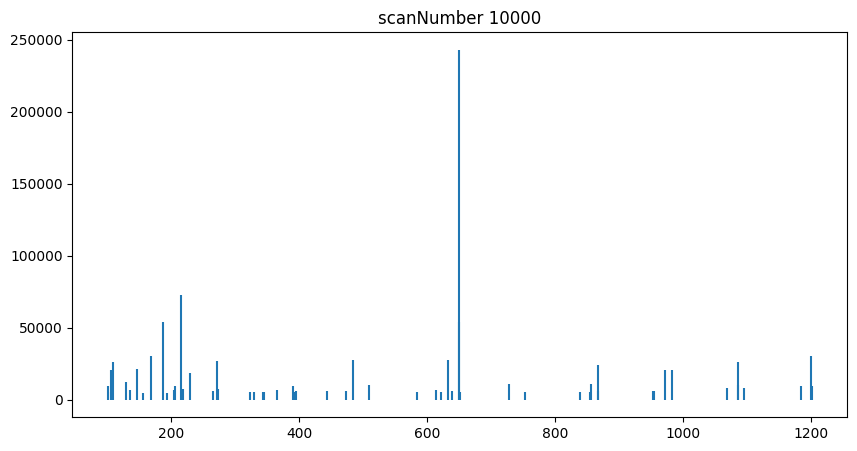

In [10]:
import matplotlib.pyplot as plt

masses, intens = rawFile.GetCentroidMassListFromScanNum(scanNumber)

print(f'masses {masses}')
print(f'intensities {intens}')

plt.figure(figsize=(10,5))
plt.vlines(masses, intens, 0)
plt.title(f'scanNumber {scanNumber}')
plt.show()

### Loading file to RAM

In [11]:
import time

from alphapept.io import load_thermo_raw
from alphapept.interface import import_raw_data

time_list = []


def ram_test():
    start_time = time.perf_counter()
    _ = load_thermo_raw(raw_path, n_most_abundant = 1000)
    end_time = time.perf_counter()
    _size = os.path.getsize(raw_path)/1024/1024/1024
    _time = end_time-start_time
    time_list.append([f'RAW to RAM (N=1, {_size:.1f}GB)', _time])
    print(f"Converting all raw files into HDF takes {end_time-start_time:.3f} seconds ({(end_time-start_time)/60:.3f} minutes)")

### Loading using AlphaPept

In [12]:
def print_data_info(settings):
    total_size = 0
    print(f"{len(settings['experiment']['file_paths'])} raw files")
    for raw_path in settings['experiment']['file_paths']:
        _size = os.path.getsize(raw_path)/1024/1024/1024
        total_size += _size
        print(f"File size of '{raw_path}' = {_size:.3f} GB")
    print(f'Total size = {total_size:.3f} GB')
    return total_size


In [13]:
def load_alphapept():
    settings = {}
    settings['experiment'] = {}
    settings['experiment']['file_paths'] = []
    settings['general'] = {}
    settings['general']['n_processes'] = 1
    settings['raw'] = {}
    settings['raw']['n_most_abundant'] = 1000

    settings['experiment']['file_paths'] = []
    settings['experiment']['file_paths'].append(raw_path)

    try:
        os.remove(raw_path[:-3]+'ms_data.hdf')
    except:
        pass

    start_time = time.perf_counter()
    import_raw_data(settings, settings_parsed=True)
    end_time = time.perf_counter()
    _size = print_data_info(settings)
    _time = end_time-start_time
    time_list.append([f'RAW to HDF (N=1, {_size:.1f}GB)', _time])
    print(f"Converting all raw files into HDF takes {end_time-start_time:.3f} seconds ({(end_time-start_time)/60:.3f} minutes)")

In [14]:
import alphapept.io

def load_hdf(hdf_file):
    start_time = time.perf_counter()
    _reader = alphapept.io.MS_Data_File(hdf_file)
    query_data = _reader.read_DDA_query_data()
    end_time = time.perf_counter()
    _size = os.path.getsize(hdf_file[:-len('ms_data.hdf')]+'raw')/1024/1024/1024
    _time = end_time-start_time
    time_list.append([f'HDF to RAM (N=1, {_size:.1f}GB)', _time])
    print(f"Loading {hdf_file} takes {end_time-start_time:.3f} seconds ({(end_time-start_time)/60:.3f} minutes)")
    return query_data


def test_load_hdf():
    _ = load_hdf(raw_path[:-3]+'ms_data.hdf')

### Parallelized version

#### Single Core

In [15]:
def test_single_core():
    settings = {}
    settings['experiment'] = {}
    settings['experiment']['file_paths'] = []
    settings['general'] = {}
    settings['general']['n_processes'] = 1
    settings['raw'] = {}
    settings['raw']['n_most_abundant'] = 1000

    settings['experiment']['file_paths'] = []
    for raw in multiple_file_test:
        settings['experiment']['file_paths'].append(os.path.join(os.path.join(tmp_folder, test_folder, raw)))

    cpu = 1
    settings['general']['n_processes'] = cpu
    for raw in settings['experiment']['file_paths']:
        try:
            os.remove(raw[:-4]+'.ms_data.hdf')
        except:
            pass


    start_time = time.perf_counter()
    import_raw_data(settings, settings_parsed=True)
    end_time = time.perf_counter()
    _size = print_data_info(settings)
    _time = end_time-start_time
    N = len(settings['experiment']['file_paths'])
    time_list.append([f'RAW to HDF (N={N}, {_size:.1f}GB, CPU={cpu})', _time])
    print(f"Converting all raw files into HDF takes {end_time-start_time:.3f} seconds ({(end_time-start_time)/60:.3f} minutes)")

#### Multicore

In [16]:
def test_multicore():
    settings = {}
    settings['experiment'] = {}
    settings['experiment']['file_paths'] = []
    settings['general'] = {}
    settings['general']['n_processes'] = 1
    settings['raw'] = {}
    settings['raw']['n_most_abundant'] = 1000

    settings['experiment']['file_paths'] = []
    for raw in multiple_file_test:
        settings['experiment']['file_paths'].append(os.path.join(os.path.join(tmp_folder, test_folder, raw)))

    
    cpu = 6
    settings['general']['n_processes'] = cpu
    for raw in settings['experiment']['file_paths']:
        try:
            os.remove(raw[:-4]+'.ms_data.hdf')
        except:
            pass

    start_time = time.perf_counter()
    import_raw_data(settings, settings_parsed=True)
    end_time = time.perf_counter()
    _size = print_data_info(settings)
    _time = end_time-start_time
    N = len(settings['experiment']['file_paths'])
    time_list.append([f'RAW to HDF (N={N}, {_size:.1f}GB, CPU={cpu})', _time])
    print(f"Converting all raw files into HDF takes {end_time-start_time:.3f} seconds ({(end_time-start_time)/60:.3f} minutes)")

In [17]:
## Test multiple times
time_list = []

for i in range(3):
    ram_test()
    load_alphapept()
    test_load_hdf()
    test_single_core()
    test_multicore()
    
    
    

Converting all raw files into HDF takes 68.562 seconds (1.143 minutes)
2023-07-18 15:41:31> Logging to C:\Users\admin\alphapept\logs\log_20230718154131.txt.
2023-07-18 15:41:31> Code location f:\projects\alphapept\alphapept
2023-07-18 15:41:31> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 15:41:31> Processing 1 files for step raw_conversion
2023-07-18 15:41:32> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1 has extension .raw - converting from Thermo.
2023-07-18 15:42:38> File conversion complete. Extracted 82,848 precursors.
2023-07-18 15:42:39> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw complete.


  0%|                                                                                            | 0/1 [01:07<?, ?it/s]

1 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
Total size = 1.567 GB
Converting all raw files into HDF takes 67.774 seconds (1.130 minutes)
Loading F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.ms_data.hdf takes 0.147 seconds (0.002 minutes)
2023-07-18 15:42:39> Logging to C:\Users\admin\alphapept\logs\log_20230718154239.txt.


2023-07-18 15:42:39> Code location f:\projects\alphapept\alphapept
2023-07-18 15:42:39> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 15:42:39> Processing 6 files for step raw_conversion
2023-07-18 15:42:39> Proccessing one by one...



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

2023-07-18 15:42:39> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1 has extension .raw - converting from Thermo.
2023-07-18 15:43:44> File conversion complete. Extracted 82,848 precursors.
2023-07-18 15:43:45> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw complete.



 17%|██████████████                                                                      | 1/6 [01:05<05:29, 65.82s/it]

2023-07-18 15:43:45> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2 has extension .raw - converting from Thermo.
2023-07-18 15:44:50> File conversion complete. Extracted 82,619 precursors.
2023-07-18 15:44:51> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw complete.



 33%|████████████████████████████                                                        | 2/6 [02:11<04:22, 65.50s/it]

2023-07-18 15:44:51> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3 has extension .raw - converting from Thermo.
2023-07-18 15:45:53> File conversion complete. Extracted 82,460 precursors.
2023-07-18 15:45:54> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw complete.



 50%|██████████████████████████████████████████                                          | 3/6 [03:15<03:14, 64.78s/it]

2023-07-18 15:45:54> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1 has extension .raw - converting from Thermo.
2023-07-18 15:47:00> File conversion complete. Extracted 81,703 precursors.
2023-07-18 15:47:01> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw complete.



 67%|████████████████████████████████████████████████████████                            | 4/6 [04:21<02:11, 65.51s/it]

2023-07-18 15:47:01> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2 has extension .raw - converting from Thermo.
2023-07-18 15:48:05> File conversion complete. Extracted 81,907 precursors.
2023-07-18 15:48:06> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw complete.



 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [05:26<01:05, 65.43s/it]

2023-07-18 15:48:06> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3 has extension .raw - converting from Thermo.
2023-07-18 15:49:10> File conversion complete. Extracted 81,461 precursors.
2023-07-18 15:49:11> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw complete.



  0%|                                                                                            | 0/1 [06:31<?, ?it/s]

6 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw' = 1.503 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw' = 1.511 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw' = 1.608 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw' = 1.510 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw' = 1.515 GB
Total size = 9.214 GB
Converting all raw files into HDF takes 391.765 seconds (6.529 minutes)
2023-07-18 15:49:11> Logging to C:\Users\admin\alphapept\logs\log_20230718154911.txt.


2023-07-18 15:49:11> Code location f:\projects\alphapept\alphapept
2023-07-18 15:49:11> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 15:49:11> Processing 6 files for step raw_conversion
2023-07-18 15:49:11> AlphaPool was set to 6 processes. Setting max to 6.
2023-07-18 15:50:34> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw for step raw_conversion succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:22<06:53, 496.22s/it]

2023-07-18 15:50:34> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw for step raw_conversion succeeded. 33.33 %
2023-07-18 15:50:34> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw for step raw_conversion succeeded. 50.00 %
2023-07-18 15:50:35> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw for step raw_conversion succeeded. 66.67 %


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:23<00:31, 95.94s/it]

2023-07-18 15:50:35> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw for step raw_conversion succeeded. 83.33 %
2023-07-18 15:50:35> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:24<00:00, 84.19s/it]


6 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw' = 1.503 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw' = 1.511 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw' = 1.608 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw' = 1.510 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw' = 1.515 GB
Total size = 9.214 GB
Converting all raw files into HDF takes 84.200 seconds (1.403 minutes)
Converting all raw files into HDF takes 67.587 seconds (1.126 minutes)
2023-07-18 15:51:43> Logging to C:\Users\admin\alphapept\logs\log_20230718155143.txt.
2023-07-18 15:51:43> Code location f:\projects\alphapept\alphapept
2023-07-18 15:51:43> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 15:51:43> Processing 1 files for step raw_conversion
2023-07-18 15:51:43> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1 has extension .raw - converting from Thermo.
2023-07-18 15:52:49> File conversion complete. Extracted 82,848 precursors.
2023-07-18 15:52:50> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw complete.


  0%|                                                                                            | 0/1 [01:07<?, ?it/s]

1 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
Total size = 1.567 GB
Converting all raw files into HDF takes 67.146 seconds (1.119 minutes)
Loading F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.ms_data.hdf takes 0.163 seconds (0.003 minutes)


2023-07-18 15:52:51> Logging to C:\Users\admin\alphapept\logs\log_20230718155251.txt.
2023-07-18 15:52:51> Code location f:\projects\alphapept\alphapept
2023-07-18 15:52:51> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 15:52:51> Processing 6 files for step raw_conversion
2023-07-18 15:52:51> Proccessing one by one...



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

2023-07-18 15:52:51> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1 has extension .raw - converting from Thermo.
2023-07-18 15:53:57> File conversion complete. Extracted 82,848 precursors.
2023-07-18 15:53:58> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw complete.



 17%|██████████████                                                                      | 1/6 [01:07<05:35, 67.08s/it]

2023-07-18 15:53:58> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2 has extension .raw - converting from Thermo.
2023-07-18 15:55:00> File conversion complete. Extracted 82,619 precursors.
2023-07-18 15:55:01> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw complete.



 33%|████████████████████████████                                                        | 2/6 [02:10<04:19, 64.84s/it]

2023-07-18 15:55:01> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3 has extension .raw - converting from Thermo.
2023-07-18 15:56:07> File conversion complete. Extracted 82,460 precursors.
2023-07-18 15:56:08> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw complete.



 50%|██████████████████████████████████████████                                          | 3/6 [03:16<03:16, 65.52s/it]

2023-07-18 15:56:08> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1 has extension .raw - converting from Thermo.
2023-07-18 15:57:15> File conversion complete. Extracted 81,703 precursors.
2023-07-18 15:57:16> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw complete.



 67%|████████████████████████████████████████████████████████                            | 4/6 [04:25<02:13, 66.70s/it]

2023-07-18 15:57:16> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2 has extension .raw - converting from Thermo.
2023-07-18 15:58:22> File conversion complete. Extracted 81,907 precursors.
2023-07-18 15:58:23> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw complete.



 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [05:31<01:06, 66.65s/it]

2023-07-18 15:58:23> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3 has extension .raw - converting from Thermo.
2023-07-18 15:59:25> File conversion complete. Extracted 81,461 precursors.
2023-07-18 15:59:26> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw complete.



  0%|                                                                                            | 0/1 [06:34<?, ?it/s]

6 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw' = 1.503 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw' = 1.511 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw' = 1.608 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw' = 1.510 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw' = 1.515 GB
Total size = 9.214 GB
Converting all raw files into HDF takes 394.972 seconds (6.583 minutes)


2023-07-18 15:59:26> Logging to C:\Users\admin\alphapept\logs\log_20230718155926.txt.
2023-07-18 15:59:26> Code location f:\projects\alphapept\alphapept
2023-07-18 15:59:26> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 15:59:26> Processing 6 files for step raw_conversion
2023-07-18 15:59:26> AlphaPool was set to 6 processes. Setting max to 6.
2023-07-18 16:00:47> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw for step raw_conversion succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:20<06:44, 485.65s/it]

2023-07-18 16:00:47> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw for step raw_conversion succeeded. 33.33 %
2023-07-18 16:00:47> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw for step raw_conversion succeeded. 50.00 %
2023-07-18 16:00:48> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw for step raw_conversion succeeded. 66.67 %


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:22<00:31, 94.25s/it]

2023-07-18 16:00:48> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw for step raw_conversion succeeded. 83.33 %
2023-07-18 16:00:48> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:22<00:00, 82.63s/it]


6 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw' = 1.503 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw' = 1.511 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw' = 1.608 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw' = 1.510 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw' = 1.515 GB
Total size = 9.214 GB
Converting all raw files into HDF takes 82.625 seconds (1.377 minutes)
Converting all raw files into HDF takes 66.694 seconds (1.112 minutes)
2023-07-18 16:01:56> Logging to C:\Users\admin\alphapept\logs\log_20230718160156.txt.
2023-07-18 16:01:56> Code location f:\projects\alphapept\alphapept
2023-07-18 16:01:56> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 16:01:56> Processing 1 files for step raw_conversion
2023-07-18 16:01:56> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1 has extension .raw - converting from Thermo.
2023-07-18 16:03:02> File conversion complete. Extracted 82,848 precursors.
2023-07-18 16:03:03> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw complete.


  0%|                                                                                            | 0/1 [01:07<?, ?it/s]

1 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
Total size = 1.567 GB
Converting all raw files into HDF takes 67.216 seconds (1.120 minutes)
Loading F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.ms_data.hdf takes 0.162 seconds (0.003 minutes)


2023-07-18 16:03:03> Logging to C:\Users\admin\alphapept\logs\log_20230718160303.txt.
2023-07-18 16:03:03> Code location f:\projects\alphapept\alphapept
2023-07-18 16:03:03> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 16:03:03> Processing 6 files for step raw_conversion
2023-07-18 16:03:03> Proccessing one by one...



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

2023-07-18 16:03:03> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1 has extension .raw - converting from Thermo.
2023-07-18 16:04:08> File conversion complete. Extracted 82,848 precursors.
2023-07-18 16:04:09> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw complete.



 17%|██████████████                                                                      | 1/6 [01:05<05:27, 65.52s/it]

2023-07-18 16:04:09> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2 has extension .raw - converting from Thermo.
2023-07-18 16:05:12> File conversion complete. Extracted 82,619 precursors.
2023-07-18 16:05:13> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw complete.



 33%|████████████████████████████                                                        | 2/6 [02:10<04:19, 64.96s/it]

2023-07-18 16:05:13> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3 has extension .raw - converting from Thermo.
2023-07-18 16:06:18> File conversion complete. Extracted 82,460 precursors.
2023-07-18 16:06:19> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw complete.



 50%|██████████████████████████████████████████                                          | 3/6 [03:15<03:15, 65.13s/it]

2023-07-18 16:06:19> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1 has extension .raw - converting from Thermo.
2023-07-18 16:07:25> File conversion complete. Extracted 81,703 precursors.
2023-07-18 16:07:26> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw complete.



 67%|████████████████████████████████████████████████████████                            | 4/6 [04:22<02:11, 65.87s/it]

2023-07-18 16:07:26> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2 has extension .raw - converting from Thermo.
2023-07-18 16:08:28> File conversion complete. Extracted 81,907 precursors.
2023-07-18 16:08:29> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw complete.



 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [05:26<01:05, 65.05s/it]

2023-07-18 16:08:29> File F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3 has extension .raw - converting from Thermo.
2023-07-18 16:09:35> File conversion complete. Extracted 81,461 precursors.
2023-07-18 16:09:36> File conversion of file F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw complete.



  0%|                                                                                            | 0/1 [06:32<?, ?it/s]

6 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw' = 1.503 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw' = 1.511 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw' = 1.608 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw' = 1.510 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw' = 1.515 GB
Total size = 9.214 GB
Converting all raw files into HDF takes 392.845 seconds (6.547 minutes)
2023-07-18 16:09:36> Logging to C:\Users\admin\alphapept\logs\log_20230718160936.txt.


2023-07-18 16:09:36> Code location f:\projects\alphapept\alphapept
2023-07-18 16:09:36> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-18 16:09:36> Processing 6 files for step raw_conversion
2023-07-18 16:09:36> AlphaPool was set to 6 processes. Setting max to 6.
2023-07-18 16:10:57> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw for step raw_conversion succeeded. 16.67 %


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:21<06:46, 487.57s/it]

2023-07-18 16:10:57> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw for step raw_conversion succeeded. 33.33 %
2023-07-18 16:10:57> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw for step raw_conversion succeeded. 50.00 %
2023-07-18 16:10:59> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw for step raw_conversion succeeded. 66.67 %


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:23<00:31, 95.37s/it]

2023-07-18 16:10:59> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw for step raw_conversion succeeded. 83.33 %
2023-07-18 16:10:59> Processing of F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw for step raw_conversion succeeded. 100.00 %


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:23<00:00, 83.40s/it]

6 raw files
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_1.raw' = 1.567 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_2.raw' = 1.503 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa12_3.raw' = 1.511 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_1.raw' = 1.608 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_2.raw' = 1.510 GB
File size of 'F:/projects/alphapept/sandbox/temp\fig2\PXD006109_HeLa2_3.raw' = 1.515 GB
Total size = 9.214 GB
Converting all raw files into HDF takes 83.417 seconds (1.390 minutes)


In [18]:
time_list

[['RAW to RAM (N=1, 1.6GB)', 68.5623113],
 ['RAW to HDF (N=1, 1.6GB)', 67.7743174],
 ['HDF to RAM (N=1, 1.6GB)', 0.1465077000000008],
 ['RAW to HDF (N=6, 9.2GB, CPU=1)', 391.7649778],
 ['RAW to HDF (N=6, 9.2GB, CPU=6)', 84.20014229999992],
 ['RAW to RAM (N=1, 1.6GB)', 67.58749909999995],
 ['RAW to HDF (N=1, 1.6GB)', 67.14572380000004],
 ['HDF to RAM (N=1, 1.6GB)', 0.16291109999997389],
 ['RAW to HDF (N=6, 9.2GB, CPU=1)', 394.97225230000004],
 ['RAW to HDF (N=6, 9.2GB, CPU=6)', 82.62459940000008],
 ['RAW to RAM (N=1, 1.6GB)', 66.69398189999993],
 ['RAW to HDF (N=1, 1.6GB)', 67.21631040000011],
 ['HDF to RAM (N=1, 1.6GB)', 0.16233050000005278],
 ['RAW to HDF (N=6, 9.2GB, CPU=1)', 392.8448909000001],
 ['RAW to HDF (N=6, 9.2GB, CPU=6)', 83.41701169999988]]

In [20]:
time_list = [['RAW to RAM (N=1, 1.6GB)', 68.5623113],
 ['RAW to HDF (N=1, 1.6GB)', 67.7743174],
 ['HDF to RAM (N=1, 1.6GB)', 0.1465077000000008],
 ['RAW to HDF (N=6, 9.2GB, CPU=1)', 391.7649778],
 ['RAW to HDF (N=6, 9.2GB, CPU=6)', 84.20014229999992],
 ['RAW to RAM (N=1, 1.6GB)', 67.58749909999995],
 ['RAW to HDF (N=1, 1.6GB)', 67.14572380000004],
 ['HDF to RAM (N=1, 1.6GB)', 0.16291109999997389],
 ['RAW to HDF (N=6, 9.2GB, CPU=1)', 394.97225230000004],
 ['RAW to HDF (N=6, 9.2GB, CPU=6)', 82.62459940000008],
 ['RAW to RAM (N=1, 1.6GB)', 66.69398189999993],
 ['RAW to HDF (N=1, 1.6GB)', 67.21631040000011],
 ['HDF to RAM (N=1, 1.6GB)', 0.16233050000005278],
 ['RAW to HDF (N=6, 9.2GB, CPU=1)', 392.8448909000001],
 ['RAW to HDF (N=6, 9.2GB, CPU=6)', 83.41701169999988]]

In [21]:
import pandas as pd
df = pd.DataFrame(time_list)

In [22]:
mean_ = df.groupby(0).mean()
std_ = df.groupby(0).std()

mean_ = mean_.loc[[_[0] for _ in time_list[:5]]]
std_ = std_.loc[[_[0] for _ in time_list[:5]]]

C:\Users\admin\AppData\Local\Temp\ipykernel_8320\2883549938.py:34: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 0.5*1e4])


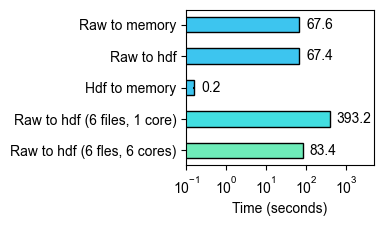

In [23]:
import matplotlib.pyplot as plt
import numpy as np

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'


time_used = mean_.values.flatten()
time_std = std_.values.flatten()

labels = mean_.index.tolist()

hfont = {'fontname':'Arial', 'size':10}
plt.figure(figsize=(3.94,2.363)) #100x60
height=0.5
ind = list(range(len(labels)))[::-1]

text = ['Raw to memory', 'Raw to hdf', 'Hdf to memory',  'Raw to hdf (6 files, 1 core)',  'Raw to hdf (6 fles, 6 cores)']

for i, t in zip(ind, time_used):
    plt.text(t*1.5, i, f'{t:.1f}', **hfont, va='center')

plt.barh(ind[:3], time_used[:3], height, color =light_blue, xerr = time_std[:3], linewidth=1, edgecolor='black')
plt.barh(ind[3], time_used[3], height, color =teal, xerr = time_std[3], linewidth=1, edgecolor='black')
plt.barh(ind[4], time_used[4], height, color =green, xerr = time_std[4], linewidth=1, edgecolor='black')

plt.yticks(ind, text, **hfont)
plt.xticks(**hfont)

plt.xscale('log')
plt.xlim([0, 0.5*1e4])
plt.xticks([0.1, 1e0, 1e1, 1e2 , 1e3])
plt.xlabel('Time (seconds)', **hfont)
plt.tight_layout()
plt.savefig('./figures/02_io.pdf')  
plt.show()

In [24]:
display(std_)
display(mean_)

,1
0,
"RAW to RAM (N=1, 1.6GB)",0.934459
"RAW to HDF (N=1, 1.6GB)",0.344355
"HDF to RAM (N=1, 1.6GB)",0.009307
"RAW to HDF (N=6, 9.2GB, CPU=1)",1.631895
"RAW to HDF (N=6, 9.2GB, CPU=6)",0.787776


,1
0,
"RAW to RAM (N=1, 1.6GB)",67.614597
"RAW to HDF (N=1, 1.6GB)",67.378784
"HDF to RAM (N=1, 1.6GB)",0.157250
"RAW to HDF (N=6, 9.2GB, CPU=1)",393.194040
"RAW to HDF (N=6, 9.2GB, CPU=6)",83.413918
